In [1]:
import os
import json
import matplotlib.pyplot as plt

In [2]:
# Directories to process
directories = {
    "13D": "blue",  # Directory and its corresponding color for the plot
    "RGB": "orange"
}

In [4]:
# Create empty lists to store global data
global_bpp = []
global_psnr = []
global_colors = []

# Dictionary to store data per image and per hyperparameter configuration
image_data = {}
config_data = {}

In [5]:
# Process each directory
for dir_name, color in directories.items():
    root_dir = os.path.join(dir_name, "experimental-results")
    
    # Loop through the subdirectories in the experimental results directory
    for subdir in os.listdir(root_dir):
        subdir_path = os.path.join(root_dir, subdir)
        
        # Check if the subdir is indeed a directory
        if os.path.isdir(subdir_path):
            # Parse the configuration and image name from the subdirectory name
            config, image = subdir.split('_')
            
            # Read the stats.json file
            stats_file = os.path.join(subdir_path, "stats.json")
            if os.path.isfile(stats_file):
                with open(stats_file, 'r') as f:
                    stats = json.load(f)
                
                # Extract bpp and psnr values
                if dir_name == "13D":
                    bpp = stats.get("bpp") / 13
                if dir_name == "RGB":
                    bpp = stats.get("bpp") / 3
                psnr = stats.get("psnr")
                
                # Append global data
                global_bpp.append(bpp)
                global_psnr.append(psnr)
                global_colors.append(color)  # Store the color for this point
                
                # Store data per image
                if image not in image_data:
                    image_data[image] = {}
                if dir_name not in image_data[image]:
                    image_data[image][dir_name] = {'bpp': [], 'psnr': []}
                image_data[image][dir_name]['bpp'].append(bpp)
                image_data[image][dir_name]['psnr'].append(psnr)
                
                # Store data per hyperparameter configuration
                if config not in config_data:
                    config_data[config] = {}
                if dir_name not in config_data[config]:
                    config_data[config][dir_name] = {'bpp': [], 'psnr': []}
                config_data[config][dir_name]['bpp'].append(bpp)
                config_data[config][dir_name]['psnr'].append(psnr)


In [6]:
image_data

{'al': {'13D': {'bpp': [0.008457477276141826,
    0.008254418006310096,
    0.12155210054837741,
    0.12339958777794471,
    0.008457477276141826,
    0.008254418006310096,
    0.12155210054837741,
    0.12339958777794471],
   'psnr': [12.198854446411133,
    12.12826156616211,
    15.645041465759277,
    15.957798957824707,
    12.198854446411133,
    12.12826156616211,
    15.645041465759277,
    15.957798957824707]},
  'RGB': {'bpp': [0.035916646321614586,
    0.0355224609375,
    0.5325190226236979,
    0.5383021036783854,
    0.035916646321614586,
    0.0355224609375,
    0.5325190226236979,
    0.5383021036783854],
   'psnr': [11.507122039794922,
    11.562286376953125,
    15.371034622192383,
    15.404840469360352,
    11.507122039794922,
    11.562286376953125,
    15.371034622192383,
    15.404840469360352]}},
 'am': {'13D': {'bpp': [0.008070138784555288,
    0.00819690410907452,
    0.12175574669471154,
    0.12433389516977164,
    0.008070138784555288,
    0.00819690410907

In [7]:
config_data

{'l1h1w1': {'13D': {'bpp': [0.008457477276141826,
    0.008070138784555288,
    0.008147019606370192,
    0.008371206430288462,
    0.008350665752704326,
    0.00851146991436298,
    0.00839996337890625,
    0.008535531850961538,
    0.008093613844651442,
    0.0081329345703125,
    0.00815112774188702,
    0.008147606482872596],
   'psnr': [12.198854446411133,
    17.13127899169922,
    20.463808059692383,
    16.54386329650879,
    23.45292854309082,
    19.272220611572266,
    14.496377944946289,
    30.491044998168945,
    18.048688888549805,
    13.991643905639648,
    14.882554054260254,
    11.885870933532715]},
  'RGB': {'bpp': [0.035916646321614586,
    0.036343892415364586,
    0.035329182942708336,
    0.035807291666666664,
    0.03582000732421875,
    0.035822550455729164,
    0.034993489583333336,
    0.036590576171875,
    0.035123189290364586,
    0.036099751790364586,
    0.036310831705729164,
    0.035001118977864586],
   'psnr': [11.507122039794922,
    29.83492660522

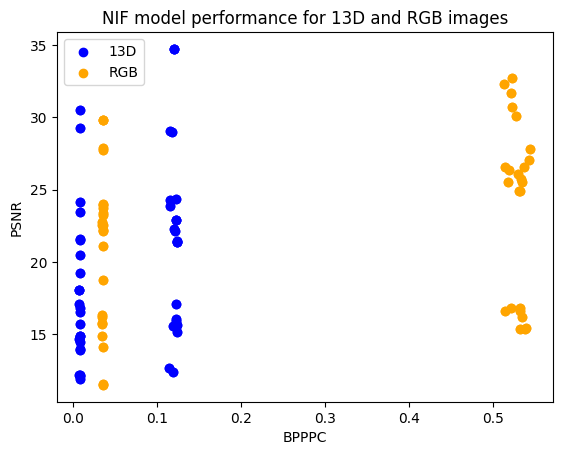

In [8]:
# Plot global bpp vs psnr for both directories with different colors
plt.figure()
for color, label in directories.items():
    indices = [i for i, c in enumerate(global_colors) if c == directories[color]]
    plt.scatter([global_bpp[i] for i in indices], [global_psnr[i] for i in indices], color=directories[color], label=color)

plt.xlabel('BPPPC')
plt.ylabel('PSNR')
plt.title('NIF model performance for 13D and RGB images')
plt.legend()
plt.savefig('plots/combined_bpppc_vs_psnr.png')
plt.show()

### Create a plot where the results are averaged over the images

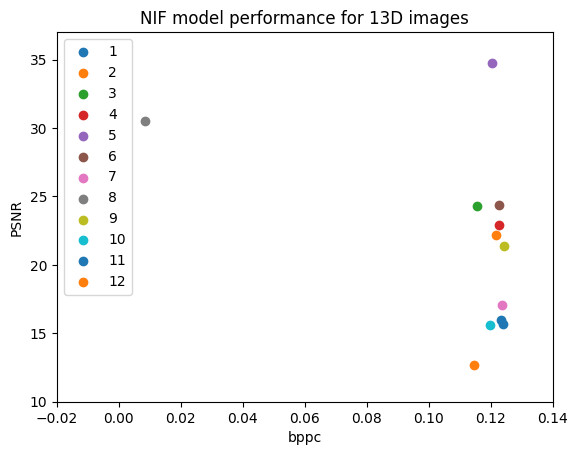

In [10]:
# Plot the max bpp vs psnr per 13D image
plt.figure()

image_i = {'al': 1, 'am': 2,'ba': 3,'be': 4,'co': 5,'gr': 6,'ij': 7,'me': 8,'sa': 9,'to': 10,'us': 11,'wi': 12}

for image in image_data.keys():
    for dim in image_data[image].keys():
        # print(image)
        bpp_list = image_data[image][dim]['bpp']
        psnr_list = image_data[image][dim]['psnr']
        # print(psnr_list)
        # bpp_max = max(bpp_list) #sum(bpp_list)/len(bpp_list)
        psnr_max = max(psnr_list) #sum(psnr_list)/len(psnr_list)
        bpp_i = psnr_list.index(psnr_max)
        bpp_value = bpp_list[bpp_i]
        if dim == '13D':
            plt.scatter(bpp_value, psnr_max, label=image_i[image])
            # added_labels['blue'] = True

ax = plt.gca()
ax.set_xlim([-0.02, 0.14])
ax.set_ylim([10, 37])
plt.xlabel('bppc')
plt.ylabel('PSNR')
plt.title('NIF model performance for 13D images')
plt.legend()
plt.savefig('plots/combined_bpppc_vs_psnr_max_13D.png')
plt.show()

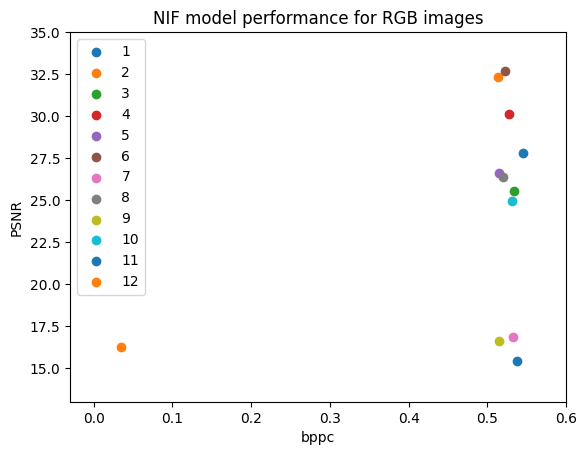

In [11]:
# Plot average global bpp vs psnr for the rgb images
plt.figure()

# added_labels = {'blue': False, 'orange': False}

for image in image_data.keys():
    for dim in image_data[image].keys():
        bpp_list = image_data[image][dim]['bpp']
        psnr_list = image_data[image][dim]['psnr']
        # bpp_avg = sum(bpp_list)/len(bpp_list)
        psnr_max = max(psnr_list)
        bpp_i = psnr_list.index(psnr_max)
        bpp_value = bpp_list[bpp_i]
        if dim == 'RGB':
            plt.scatter(bpp_value, psnr_max, label=image_i[image])
            # added_labels['blue'] = True

ax = plt.gca()
ax.set_xlim([-0.03, 0.6])
ax.set_ylim([13, 35])
plt.xlabel('bppc')
plt.ylabel('PSNR')
plt.title('NIF model performance for RGB images')
plt.legend()
plt.savefig('plots/combined_bpppc_vs_psnr_max_RGB.png')
plt.show()

### Create tables

In [12]:
# # Plot average global bpp vs psnr for 13D images
# plt.figure()

# for config in config_data.keys():
#     for dim in config_data[config].keys():
#         bpp_list = config_data[config][dim]['bpp']
#         psnr_list = config_data[config][dim]['psnr']
#         bpp_avg = sum(bpp_list)/len(bpp_list)
#         psnr_avg = sum(psnr_list)/len(psnr_list)
#         if dim == '13D':
#             plt.scatter(bpp_avg, psnr_avg, label=config)

# plt.xlabel('BPPPC')
# plt.ylabel('PSNR')
# plt.title('NIF model performance for 13D images')
# plt.legend()
# plt.savefig('plots/combined_bpppc_vs_psnr_avgconfig_13D.png')
# plt.show()

In [25]:
import pandas as pd

# Dictionary to store average BPPPC and PSNR values for each config
config_table = {'Config': [], 'Avg BPPPC': [], 'Avg PSNR': [], 'BPPPC for max PSNR': [], 'Max PSNR': []}

# Loop through each configuration
for config in config_data.keys():
    for dim in config_data[config].keys():
        bpp_list = config_data[config][dim]['bpp']
        psnr_list = config_data[config][dim]['psnr']
        
        # Calculate averages
        bpp_avg = sum(bpp_list) / len(bpp_list)
        psnr_avg = sum(psnr_list) / len(psnr_list)
        psnr_max = max(psnr_list)
        i_bpp = psnr_list.index(psnr_max)
        bpp_val = bpp_list[i_bpp]
        
        # Only consider '13D' configurations
        if dim == '13D':
            config_table['Config'].append(config)
            config_table['Avg BPPPC'].append(bpp_avg)
            config_table['Avg PSNR'].append(psnr_avg)
            config_table['BPPPC for max PSNR'].append(bpp_val)
            config_table['Max PSNR'].append(psnr_max)

# Convert the dictionary into a pandas DataFrame
df = pd.DataFrame(config_table)

# Display the table
print(df)

# Optionally, save the table as a CSV file for future reference
df.to_csv('config_bpppc_psnr_table_13D.csv', index=False)

   Config  Avg BPPPC   Avg PSNR  BPPPC for max PSNR   Max PSNR
0  l1h1w1   0.008281  17.738261            0.008536  30.491045
1  l1h1w2   0.008261  17.913281            0.008389  29.263275
2  l1h2w1   0.120968  21.112729            0.120286  34.736172
3  l1h2w2   0.121166  21.085449            0.120637  34.722744
4  l2h1w1   0.008281  17.738261            0.008536  30.491045
5  l2h1w2   0.008261  17.913281            0.008389  29.263275
6  l2h2w1   0.120968  21.112729            0.120286  34.736172
7  l2h2w2   0.121166  21.085449            0.120637  34.722744


In [26]:
import pandas as pd

# Dictionary to store average BPPPC and PSNR values for each config
config_table = {'Config': [], 'Avg BPPPC': [], 'Avg PSNR': [], 'BPPPC for max PSNR': [], 'Max PSNR': []}

# Loop through each configuration
for config in config_data.keys():
    for dim in config_data[config].keys():
        bpp_list = config_data[config][dim]['bpp']
        psnr_list = config_data[config][dim]['psnr']
        
        # Calculate averages
        bpp_avg = sum(bpp_list) / len(bpp_list)
        psnr_avg = sum(psnr_list) / len(psnr_list)
        psnr_max = max(psnr_list)
        i_bpp = psnr_list.index(psnr_max)
        bpp_val = bpp_list[i_bpp]
        
        # Only consider rgb configurations
        if dim == 'RGB':
            config_table['Config'].append(config)
            config_table['Avg BPPPC'].append(bpp_avg)
            config_table['Avg PSNR'].append(psnr_avg)
            config_table['BPPPC for max PSNR'].append(bpp_val)
            config_table['Max PSNR'].append(psnr_max)

# Convert the dictionary into a pandas DataFrame
df = pd.DataFrame(config_table)

# Display the table
print(df)

# Optionally, save the table as a CSV file for future reference
df.to_csv('config_bpppc_psnr_table_rgb.csv', index=False)

   Config  Avg BPPPC   Avg PSNR  BPPPC for max PSNR   Max PSNR
0  l1h1w1   0.035763  20.518602            0.036344  29.834927
1  l1h1w2   0.035742  21.292852            0.036285  29.807610
2  l1h2w1   0.530668  23.909384            0.521998  31.684528
3  l1h2w2   0.527395  23.928417            0.522985  32.711136
4  l2h1w1   0.035763  20.518602            0.036344  29.834927
5  l2h1w2   0.035742  21.292852            0.036285  29.807610
6  l2h2w1   0.530668  23.909384            0.521998  31.684528
7  l2h2w2   0.527395  23.928417            0.522985  32.711136
